In [26]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

### 3.6.2 Simple Linear Regression

In [27]:
#load data
boston = pd.read_csv('../data/boston.csv')
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [28]:
from sklearn.linear_model import LinearRegression

model_sl = LinearRegression(fit_intercept=True)

# reshape(-1, 1) is required for a single predictor
x_train = boston['lstat'].values.reshape(-1, 1) 
y_train = boston['medv']
model_sl.fit(x_train, y_train)

model_sl.intercept_, model_sl.coef_

(34.5538408793831, array([-0.95004935]))

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model_sl.predict(x_train)

R2 = r2_score(y_train, y_pred)
MSE = mean_squared_error(y_train, y_pred)

print(f'R2 Score: {R2}\nMean Squared Error: {MSE}')

R2 Score: 0.5441462975864797
Mean Squared Error: 38.48296722989415


In [30]:
import statsmodels.api as sm

# ols model with intercept
linear_results = sm.OLS(y_train, sm.add_constant(x_train)).fit()
linear_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 07 Jul 2025   Prob (F-statistic):           5.08e-88
Time:                        22:33:12   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
x1            -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# out-of-sample prediction example with scikit learn model
model_sl.predict(np.array([5, 10, 15]).reshape(-1, 1))

array([29.80359411, 25.05334734, 20.30310057])

In [32]:
# out-of-sample prediction example with statsmodels model
linear_results.predict(sm.add_constant(np.array([5, 10, 15])))

array([29.80359411, 25.05334734, 20.30310057])

<Axes: xlabel='lstat', ylabel='medv'>

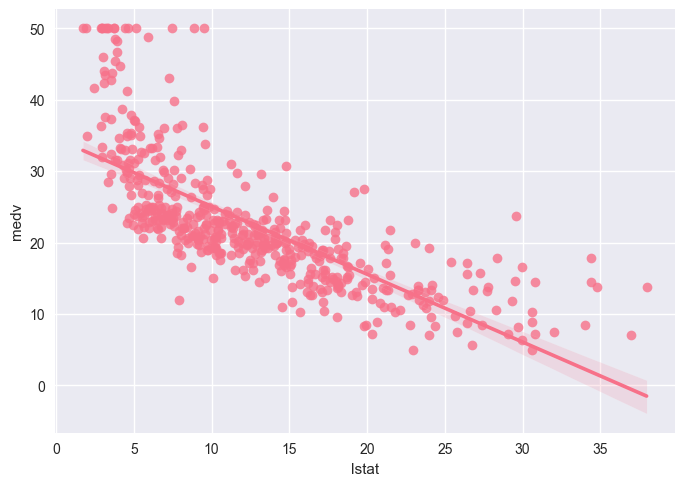

In [33]:
sns.regplot(x='lstat', y='medv', data=boston)

Text(0, 0.5, 'Studentized Residuals')

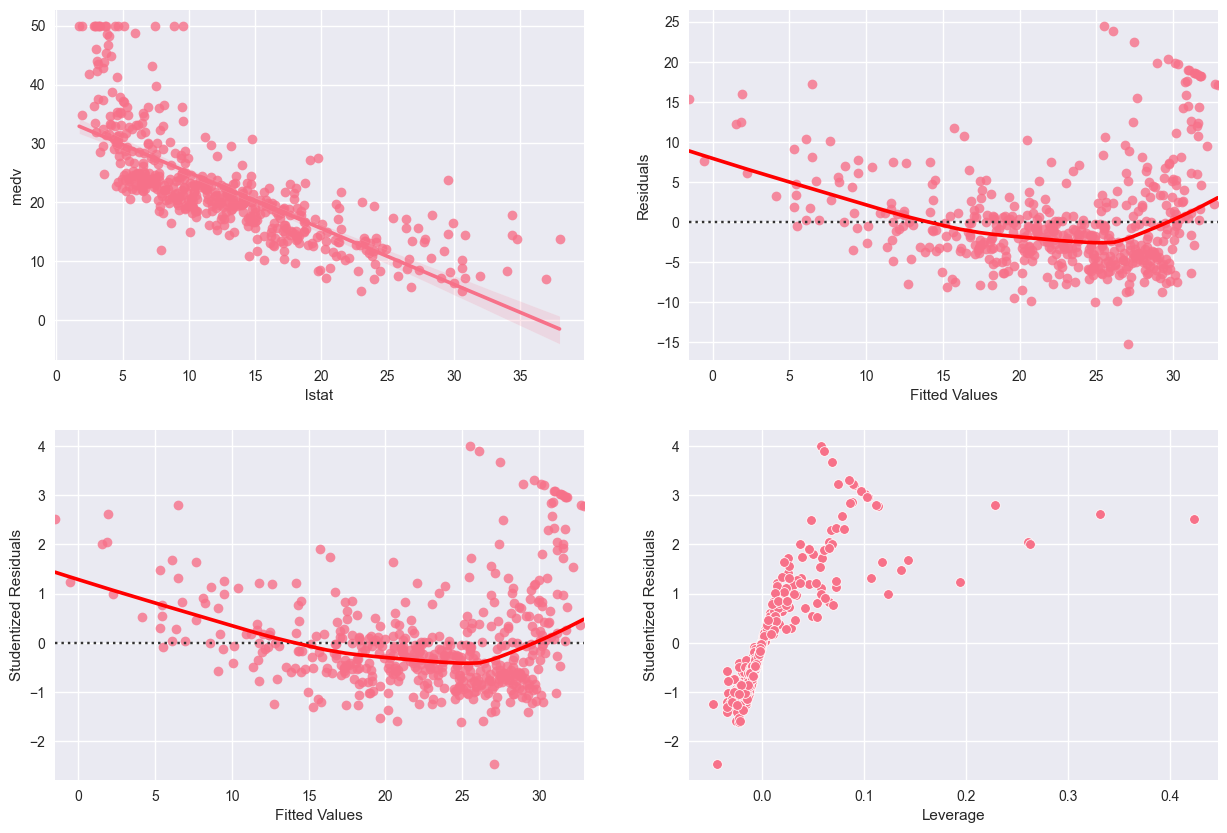

In [34]:
figure, axes = plt.subplots(2, 2, sharex=False, sharey=False)
figure.set_figheight(10)
figure.set_figwidth(15)

fitted_values = linear_results.predict(sm.add_constant(x_train))
residuals = linear_results.resid.values # residuals
stud_residuals = linear_results.outlier_test()['student_resid']

# Reg Plot 
sns.regplot(x='lstat', y='medv', data=boston, ax=axes[0, 0])

# Residual-Fitted Value Plot
ax2 = sns.residplot(x=fitted_values, y=residuals, ax=axes[0, 1], lowess=True, line_kws=dict(color="r"))
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Residuals')

# Studentized Residual-Fitted Value Plot
ax3 = sns.residplot(x=fitted_values, y=stud_residuals, ax=axes[1, 0], lowess=True, line_kws=dict(color="r"))
ax3.set_xlabel('Fitted Values')
ax3.set_ylabel('Studentized Residuals')

# Studentized Residual-Leverage Plot
from statsmodels.stats.outliers_influence import OLSInfluence

leverage = OLSInfluence(linear_results).influence
ax4 = sns.scatterplot(x=leverage, y=stud_residuals, ax=axes[1,1])
ax4.set_xlabel('Leverage')
ax4.set_ylabel('Studentized Residuals')


### 3.6.3 Multiple Linear Regression

In [35]:
x_train = sm.add_constant(boston[['lstat', 'age']])
y_true = boston['medv']

ols_sm = sm.OLS(y_true, x_train).fit()
ols_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 07 Jul 2025   Prob (F-statistic):           2.98e-88
Time:                        22:33:13   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Perform the regression over all predictors in the boston dataset

In [36]:
X = sm.add_constant(boston.iloc[:,1:-1])
y = boston['medv']

ols_sm = sm.OLS(y, X).fit()
ols_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 07 Jul 2025   Prob (F-statistic):          2.23e-133
Time:                        22:33:13   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Computing Variance Inflation Factor to see if there is any collinearity problem

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for _, predictor in enumerate(X.columns):
    if predictor == 'const':
        continue
    else:
        print('{:8}:'.format(predictor),'{:3f}'.format(vif(X.values, _)))

crim    : 1.767486
zn      : 2.298459
indus   : 3.987181
chas    : 1.071168
nox     : 4.369093
rm      : 1.912532
age     : 3.088232
dis     : 3.954037
rad     : 7.445301
tax     : 9.002158
ptratio : 1.797060
lstat   : 2.870777


In [38]:
# performing multiple linear regression without 'age' predictor because it has high p_value 
x_train = sm.add_constant(boston.drop(['medv', 'age'], axis=1))
y_true = boston['medv']

ols_sm = sm.OLS(y_true, x_train).fit()
ols_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.0
Date:                Mon, 07 Jul 2025   Prob (F-statistic):          1.16e-133
Time:                        22:33:14   Log-Likelihood:                -1504.2
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6160      4.918      8.461      0.000      31.953      51.279
Unnamed: 0    -0.0025      0.002     -1.184      0.237      -0.007       0.002
crim          -0.1222      0.033     -3.707      0.000      -0.187      -0.057
zn             0.0484      0.014      3.494      0.001       0.021       0.076
indus          0.0128      0.062      0.207      0.836      -0.109       0.135
chas           2.8625      0.868      3.299      0.001       1.158       4.567
nox          -18.4633      3.712     -4.974      0.000     -25.757     -11.170
rm             3.6927      0.411      8.981      0.000       2.885       4.501
dis           -1.5128      0.193     -7.856      0.000      -1.891      -1.134
rad            0.3072      0.069      4.481      0.000       0.173       0.442
tax           -0.0120      0.004     -3.115      0.002      -0.020      -0.004
ptratio       -0.9320      0.132     -7.081      0.000      -1.191      -0.673
lstat         -0.5522      0.048    -11.547      0.000      -0.646      -0.458
==============================================================================
Omnibus:                      168.979   Durbin-Watson:                   1.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              692.204
Skew:                           1.461   Prob(JB):                    4.89e-151
Kurtosis:                       7.929   Cond. No.                     1.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.6.4 Interaction Terms
In this section we'll add an interation term into our previous multiple linear regression model, our new interation term will be ($\text{lstat} \times \text{age}$)

In [39]:
import statsmodels.formula.api as smf

ols_smf = smf.ols(formula='medv ~ lstat*age', data=boston).fit()
ols_smf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 07 Jul 2025   Prob (F-statistic):           4.86e-88
Time:                        22:33:14   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.6.5 Non-linear Transformations of the Predictors

In [40]:
model = smf.ols(formula='medv ~ lstat + np.power(lstat, 2)', data=boston)
quadratic_results = model.fit()
quadratic_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 07 Jul 2025   Prob (F-statistic):          1.56e-112
Time:                        22:33:14   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### The near-zero p-value associated with the quadratic term suggests that it leads to an improved model.

In [41]:
from statsmodels.stats.api import anova_lm

anova_lm(linear_results, quadratic_results)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


The null hypothesis is that the two models fit the data equally well, and the alternative hypothesis is that the full model is superior. Here the F-statistic is 135 and the associated p-value is virtually zero. This provides very clear evidence that the model containing the predictors $\text{lstat}$ and $\text{lstat}^2$ is far superior to the model that only contains the predictor lstat. 

Text(0, 0.5, 'Residuals')

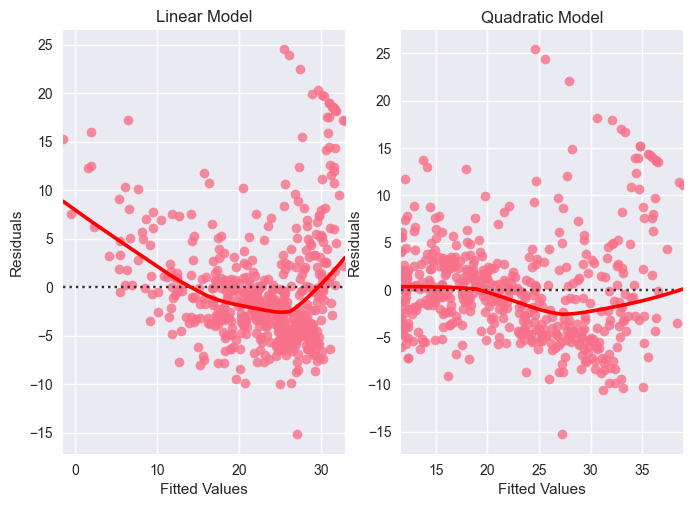

In [42]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)

quadratic_fitted_values = quadratic_results.predict(sm.add_constant(x_train))
quadratic_residuals = quadratic_results.resid.values # residuals

# Residual-Fitted Value Plot (Linear Model)
ax1 = sns.residplot(x=fitted_values, y=residuals, ax=axes[0], lowess=True, line_kws=dict(color="r"))
ax1.set_title('Linear Model')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')

# Residual-Fitted Value Plot (Quadratic Model)
ax2 = sns.residplot(x=quadratic_fitted_values, y=quadratic_residuals, ax=axes[1], lowess=True, line_kws=dict(color="r"))
ax2.set_title('Quadratic Model')
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Residuals')

##### Higher order polynomial fits

In [43]:
order_five_formula = 'medv ~ lstat + ' + '+ '.join('np.power(lstat, {})'.format(i) for i in range(2, 6))
model = smf.ols(formula=order_five_formula, data=boston)
order_five_results = model.fit()
order_five_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Mon, 07 Jul 2025   Prob (F-statistic):          8.73e-122
Time:                        22:33:14   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.6997      3.604     18.783      0.000      60.618      74.781
lstat                -11.9911      1.526     -7.859      0.000     -14.989      -8.994
np.power(lstat, 2)     1.2728      0.223      5.703      0.000       0.834       1.711
np.power(lstat, 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
np.power(lstat, 4)     0.0017      0.000      4.143      0.000       0.001       0.003
np.power(lstat, 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

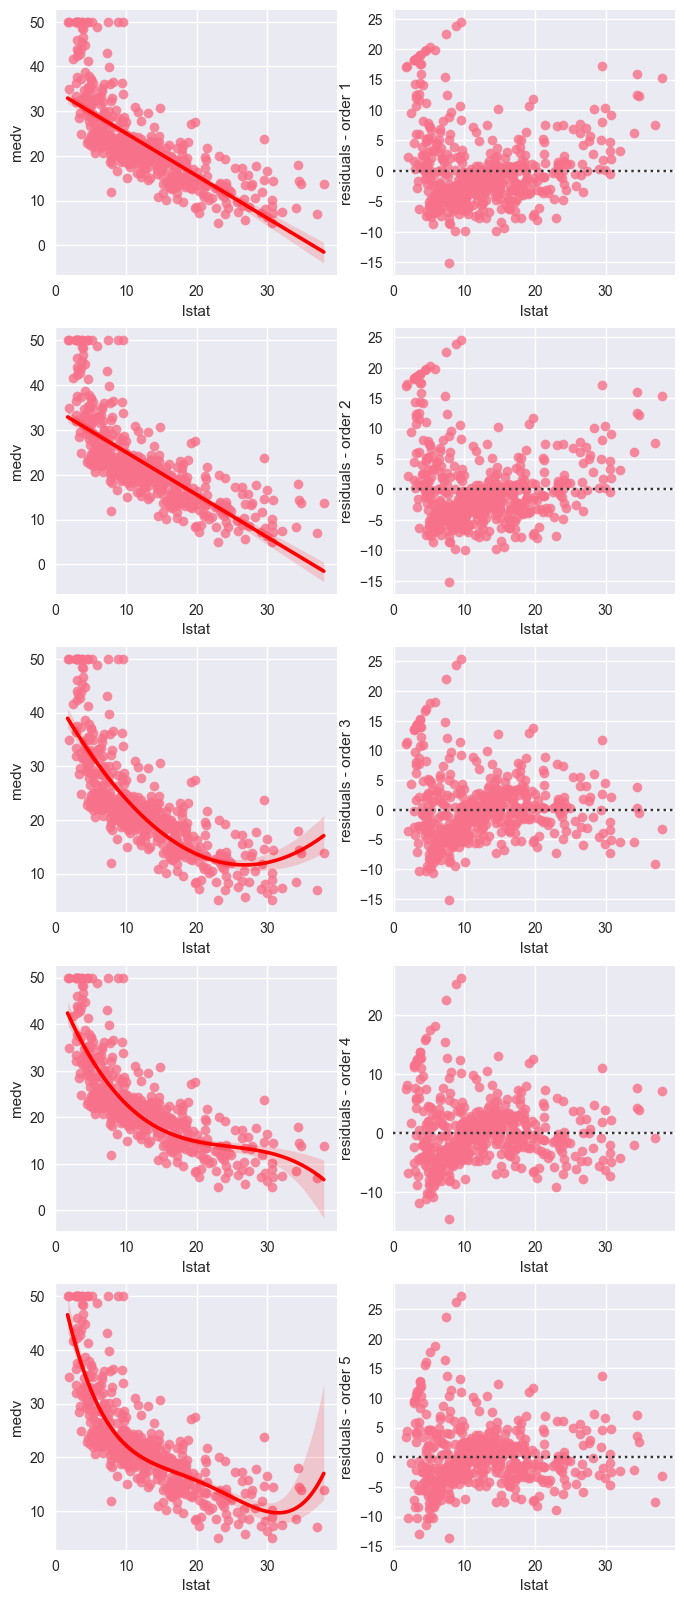

In [44]:
f, axes = plt.subplots(5, 2, sharex=False, sharey=False)
f.set_figheight(20)

orders = [1, 2, 3, 4, 5]
for i in range(5):
    ax1 = sns.regplot(x='lstat', y='medv', data=boston, ax=axes[i,0], order=i, line_kws={'color': 'red'})
    ax1.set_xlabel('lstat')
    ax1.set_ylabel('medv')
    
    ax2 = sns.residplot(x='lstat', y='medv', data=boston, ax=axes[i,1], order=i, line_kws={'color': 'red'})
    ax2.set_xlabel('lstat')
    ax2.set_ylabel(f'residuals - order {i+1}')

### 3.6.6 Qualitative Predictors
We will attempt to predict Sales (child car seat sales) in 400 locations based on a number of predictors.

In [45]:
carseats = pd.read_csv('../data/carseats.csv')
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


The Carseats data includes qualitative predictors such as Shelveloc, an indicator of the quality of the shelving location—that is, the space within a store in which the car seat is displayed—at each location. The predictor Shelveloc takes on three possible values: Bad, Medium, and Good.

In [46]:
formula ='Sales ~' + '+'.join(list(carseats.iloc[:,1:].columns.tolist()) + ['Income:Advertising'] + ['Price:Age'])
formula

'Sales ~CompPrice+Income+Advertising+Population+Price+ShelveLoc+Age+Education+Urban+US+Income:Advertising+Price:Age'

In [47]:
model = smf.ols(formula, data=carseats)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Mon, 07 Jul 2025   Prob (F-statistic):          6.14e-166
Time:                        22:33:16   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""